Ver si existe relacion entre nivel de satisfaccion  en el trabajo y la rotacion de los empleados y ver la magnitud de la relacion  

H0 "Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. Se sospecha que los empleados con niveles de satisfacción más bajos tienen una mayor probabilidad de dejar la empresa".  

Para ello deberéis crear una columna nueva en base al nivel de satisfacción en el trabajo para crear dos grupos, las condiciones para crear los grupos son:

    - Grupo A (Control): Empleados con un nivel de satisfacción en el trabajo igual o superior a 3 en una escala de 1 a 5

    - Grupo B (Variante): Empleados con un nivel de satisfacción en el trabajo inferior a 3 en la misma escala.  
    
La métrica principal que debes usar es la tasa de rotación de empleados (Attrition) en cada grupo. Recordemos que, en esta columna, "No" indica que el empleado no ha dejado la empresa (sin rotación), mientras que "Yes" indica que el empleado ha dejado la empresa (con rotación).


- Analiza los resultados.

- Calcula la magnitud de esta relación utilizando estadísticas como la diferencia de medias por ejemplo.  




In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Realizar los distintos test
# ------------------------------------------------------------------------------

from scipy.stats import ttest_ind, norm, chi2_contingency, f_oneway
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from scipy import stats
from scipy.stats import levene
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv("Files/df_fase1.csv", index_col=0)
df.head(2)

,IdEmployee,EmployeeNumber,Age,DateBirth,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,RemoteWork
0,0,"162,0",52,1972,No,no-data,684.0,6,3,no-data,1,Male,51.0,3,5,Research Director,3,no-data,6462.0,7,No,13,3,3,0,no-data,5,3,20,15,15,True
1,1,"259,0",53,1971,No,no-data,699.0,1,4,Life Sciences,1,Male,65.0,2,5,Manager,3,no-data,5678.0,0,no-data,14,3,1,1,"34,0",5,3,33,11,9,True


- Divide a los empleados en los grupos A y B según los criterios establecidos.

In [3]:
# División del grupo A, empleados con un nivel de satisfacción igual o superior a 3.
# Vamos a imputar una columna, que nos indique, por fila, a qué grupo pertenece según su JobSatisfaction.

df['GroupSatisfaction'] = df['JobSatisfaction'].apply(lambda x: 'A' if x >= 3 else 'B')

In [24]:


# Paso 1: Agrupamos los datos por "GroupSatisfaction" y "Attrition"
conteo_grupos = df.groupby(['GroupSatisfaction', 'Attrition']).size().unstack()

# Paso 2: Calcular la tasa de rotación para cada grupo
# "Yes" es el número de personas que se han ido y "No" el número que se ha quedado
rotacion = (conteo_grupos['Yes'] / (conteo_grupos['Yes'] + conteo_grupos['No'])) * 100

# Mostrar los resultados
print("Tasa de rotación por grupo:")
print(rotacion)


Tasa de rotación por grupo:
GroupSatisfaction
A    13.849509
B    19.520548
dtype: float64


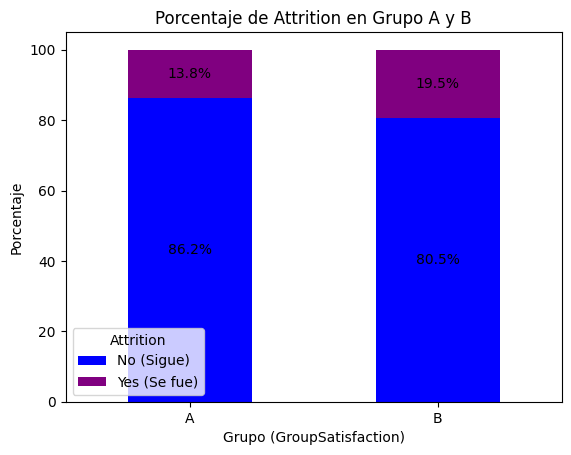

In [23]:
# Paso 1: Agrupamos los datos por "GroupSatisfaction" y "Attrition"
conteo_grupos = df.groupby(['GroupSatisfaction', 'Attrition']).size().unstack()

# Paso 2: Calculamos los porcentajes para cada grupo
porcentajes = conteo_grupos.apply(lambda x: x / x.sum() * 100, axis=1)

# Paso 3: Crear el gráfico de barras
ax = porcentajes.plot(kind='bar', stacked=True, color=['blue', 'purple'])

# Añadir títulos y etiquetas
plt.title('Porcentaje de Attrition en Grupo A y B')
plt.ylabel('Porcentaje')
plt.xlabel('Grupo (GroupSatisfaction)')
plt.legend(title='Attrition', labels=['No (Sigue)', 'Yes (Se fue)'])
plt.xticks(rotation=0)

# Añadir los porcentajes sobre las barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2

    # Mostrar el porcentaje en cada barra
    if height > 0:
        ax.annotate(f'{height:.1f}%', (x, y), ha='center', va='center')

# Mostrar el gráfico
plt.show()


In [6]:
df.sample(3)

,IdEmployee,EmployeeNumber,Age,DateBirth,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,RemoteWork,GroupSatisfaction
849,849,"1996,0",32,1992,No,no-data,1154.0,2,2,Life Sciences,1,Male,54.0,3,1,Sales Representative,3,no-data,6393.0,0,No,19,3,3,1,no-data,1,3,2,1,2,True,A
89,89,"683,0",35,1989,No,travel_rarely,1397.0,1,5,no-data,1,Male,42.0,3,1,Research Scientist,4,Married,7660.0,1,No,12,3,4,1,no-data,4,2,10,8,8,True,A
1053,1053,"1763,0",31,1993,No,no-data,305.0,16,3,no-data,1,Male,58.0,4,2,Healthcare Representative,3,Married,9128.0,3,No,16,3,3,1,"10,0",3,3,7,1,7,False,A


In [25]:
groupB = df[df['GroupSatisfaction'] == 'B']
groupB.sample(2)

,IdEmployee,EmployeeNumber,Age,DateBirth,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,RemoteWork,GroupSatisfaction
794,794,"1576,0",49,1975,No,travel_rarely,1108.0,15,4,no-data,1,Female,65.0,3,1,Research Scientist,1,Married,16530.0,8,no-data,12,3,4,1,no-data,3,2,8,7,6,True,B
468,468,"1664,0",37,1987,No,travel_rarely,1040.0,11,2,Life Sciences,1,Male,79.0,4,2,Healthcare Representative,1,Divorced,26308.0,6,No,20,4,1,1,"13,0",3,3,5,0,4,True,B


In [34]:
# crear un diccionario con dos columnas, la del grupo a la que pertecen y otra con los valores de CTR (con una distribución normal)
data_t = {'GroupSatisfaction': ['A'] * 25 + ['B'] * 25,
        'Attrition': np.concatenate([np.random.normal(0.02, 0.01, 25),
                               np.random.normal(0.025, 0.01, 25)])}

df_t = pd.DataFrame(data_t)
df_t.head()

,GroupSatisfaction,Attrition
0,A,0.035542
1,A,0.035061
2,A,0.030849
3,A,0.012861
4,A,0.023161


<Axes: xlabel='GroupSatisfaction', ylabel='Attrition'>

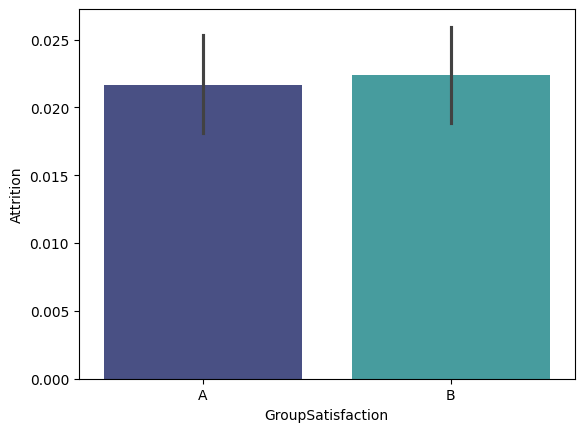

In [35]:
sns.barplot(x="GroupSatisfaction", y="Attrition", data=df_t,  palette = "mako")

In [36]:
# Al igual que en el ejemplo del jupyter principal, debemos dividir los datos en grupo control y test
control_group_t = df_t[df_t['GroupSatisfaction'] == 'A']['Attrition']
test_group_t = df_t[df_t['GroupSatisfaction'] == 'B']['Attrition']

# utilizando el método 'ttest_ind', evaluamos si los dos grupos son diferentes
t_stat, p_value = ttest_ind(control_group_t, test_group_t)

# Imprimir el resultado de la prueba
if p_value < 0.05:
    print("Hay una diferencia significativa en las tasas de clics entre el grupo de control y el grupo de prueba.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que existe evidencia estadística para afirmar que las medias de las muestras son distintas. 
          Por lo tanto, nuestro nuevo sistema tiene los efectos deseados y deberíamos cambiar la nueva versión de anuncios   
          """)
else:
    print("No hay evidencia de una diferencia significativa en las tasas de clics entre los grupos.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas. 
          Por lo tanto, aunque en la gráfica veamos que hay diferencias entre el grupo "test" y el grupo "control", 
          el análisis estadístico nos sugiera que estas diferencias no son significativas, 
          por lo que la nueva campaña no esta ayudando a nuestro problema.   
          """)


No hay evidencia de una diferencia significativa en las tasas de clics entre los grupos.

 ---------- 


          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas. 
          Por lo tanto, aunque en la gráfica veamos que hay diferencias entre el grupo "test" y el grupo "control", 
          el análisis estadístico nos sugiera que estas diferencias no son significativas, 
          por lo que la nueva campaña no esta ayudando a nuestro problema.   
          


In [37]:
import pandas as pd
from scipy import stats

# Supongamos que tu DataFrame es df

# Paso 1: Agrupamos los datos por "GroupSatisfaction" y "Attrition"
conteo_grupos = df.groupby(['GroupSatisfaction', 'Attrition']).size().unstack()

# Paso 2: Calcular la tasa de rotación para cada grupo
# "Yes" es el número de personas que se han ido y "No" el número que se ha quedado
rotacion = (conteo_grupos['Yes'] / (conteo_grupos['Yes'] + conteo_grupos['No'])) * 100

# Paso 3: Realizamos la prueba t de Student
# Definimos las tasas de rotación como dos muestras separadas
rotacion_A = conteo_grupos.loc['A', 'Yes'] / (conteo_grupos.loc['A', 'Yes'] + conteo_grupos.loc['A', 'No'])
rotacion_B = conteo_grupos.loc['B', 'Yes'] / (conteo_grupos.loc['B', 'Yes'] + conteo_grupos.loc['B', 'No'])

# Realizamos la prueba t de Student para comparar las tasas de rotación
t_stat, p_value = stats.ttest_ind([rotacion_A], [rotacion_B])

# Mostrar el resultado
print(f"Tasa de rotación Grupo A: {rotacion_A * 100:.2f}%")
print(f"Tasa de rotación Grupo B: {rotacion_B * 100:.2f}%")
print(f"T-statistic: {t_stat}, P-value: {p_value}")


Tasa de rotación Grupo A: 13.85%
Tasa de rotación Grupo B: 19.52%
T-statistic: nan, P-value: nan


In [ ]:
# Primero comprobamos si cada conjunto de datos sigue una distribución normal:



#### Prueba de Shapiro-Wilk

La prueba de Shapiro-Wilk es una prueba estadística paramétrica que se utiliza para evaluar la normalidad de una muestra. La hipótesis nula (H0) de esta prueba es que la muestra proviene de una población con distribución normal.

Hipótesis nula (H0): Los datos se distribuyen normalmente.
Hipótesis alternativa (H1): Los datos no se distribuyen normalmente.

##### Interpretación de los resultados
p-value > alpha: No hay suficiente evidencia para rechazar la hipótesis nula. Se concluye que los datos se ajustan a una distribución normal.
p-value <= alpha: Se rechaza la hipótesis nula. Los datos no se ajustan a una distribución normal.

In [79]:
# Primero comprobamos qué tipo de distribución tenemos con la prueba de Shapiro:

p_value = shapiro(df['IdEmployee']).pvalue

alpha = 0.05

if p_value > alpha:
    print("Los datos se ajustan a una distribución normal (p-value =", p_value, ")")
else:
    print("Los datos no se ajustan a una distribución normal (p-value =", p_value, ")")

Los datos no se ajustan a una distribución normal (p-value = 3.997729973138971e-21 )


In [ ]:
# Haremos la prueba Z porque conocemos la desviación estándar de la población y es apropiada para muestras grandes:



In [ ]:
mport pandas as pd
import matplotlib.pyplot as plt


# Crear el gráfico de barras
fig, ax = plt.subplots()

# Crear un gráfico apilado de barras con los datos
df.pivot(index='Categoria', columns='Estado', values='Porcentaje').plot(kind='bar', stacked=True, ax=ax)

# Añadir títulos y etiquetas
ax.set_title('Porcentaje de Trabajadores Satisfechos y Menos Satisfechos')
ax.set_ylabel('Porcentaje')
ax.set_xlabel('Categoria')

# Mostrar la leyenda y el gráfico
plt.legend(title='Estado')
plt.tight_layout()
plt.show
() 